<a href="https://colab.research.google.com/github/brromeroc/Tallermodelosdeapredizaje/blob/main/Taller_modelos_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Solución Taller modelos de aprendizaje**

Brayan Alejandro Romero Castro

Partiendo de los problemas del taller modelos de SVM, implemente un modelo de aprendizaje de maquina que considere los espacios de hipótesis revisados en clase. El modelo debe garantizar:

**1.** Generalización por medio de una estrategia de adecuada de validación cruzada.

**2.** Ajuste de hiperparametros (con una selección adecuada de hiperparametros para cada modelo)

$\underline{\textit{Solución.}}$


Recordemos que los espacios de hypotesis vitos en clase exeptuando el de las rectas (con cual se hizo la tarea número 1) fueron:

+ Knn
+ Kernel polinomial
+ Arboles de desición 
+ Regresión logistica

Para cada uno de los anteriores espacios de hipotesis $\mathcal{H}$, realizemos los pedido, primero recordemos que los datos de la tarea 1 son los siguientes:


En primer lugar vamos a implementar el modelo de aprendizaje relacionado con regresión logistica a las bases de datos previamente estudiadas. Para la base de datos (Banknote authentication Data Set).

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

percentage_sample = 0.8
sample_size = df.shape[0]

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values
     

In [ ]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### **Código que permite hacer validación cruzada**

Aquí se introduce el código que permite hacer validación cruzada por  capas.

In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

### **Regresión logistica**

En esta parte implementamos la validación cruzada de esta base de datos para el modelo de regresión logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_regression = LogisticRegression(random_state=0)

Logistic_regression_result = cross_validation(Logistic_regression, X, y, 5)
print(Logistic_regression_result)

{'Training Accuracy scores': array([0.99179581, 0.98997265, 0.99271403, 0.98724954, 0.99089253]), 'Mean Training Accuracy': 99.05249122876931, 'Training Precision scores': array([0.98580122, 0.98181818, 0.98780488, 0.97975709, 0.98380567]), 'Mean Training Precision': 0.9837974059883878, 'Training Recall scores': array([0.99590164, 0.99590164, 0.99590164, 0.99180328, 0.99590164]), 'Mean Training Recall': 0.9950819672131148, 'Training F1 scores': array([0.99082569, 0.98880977, 0.99183673, 0.98574338, 0.9898167 ]), 'Mean Training F1 Score': 0.9894064540512095, 'Validation Accuracy scores': array([0.98909091, 0.98909091, 0.98175182, 1.        , 0.98905109]), 'Mean Validation Accuracy': 98.97969475779695, 'Validation Precision scores': array([0.976     , 0.99173554, 0.968     , 1.        , 0.98373984]), 'Mean Validation Precision': 0.9838950749176913, 'Validation Recall scores': array([1.        , 0.98360656, 0.99180328, 1.        , 0.99180328]), 'Mean Validation Recall': 0.9934426229508195

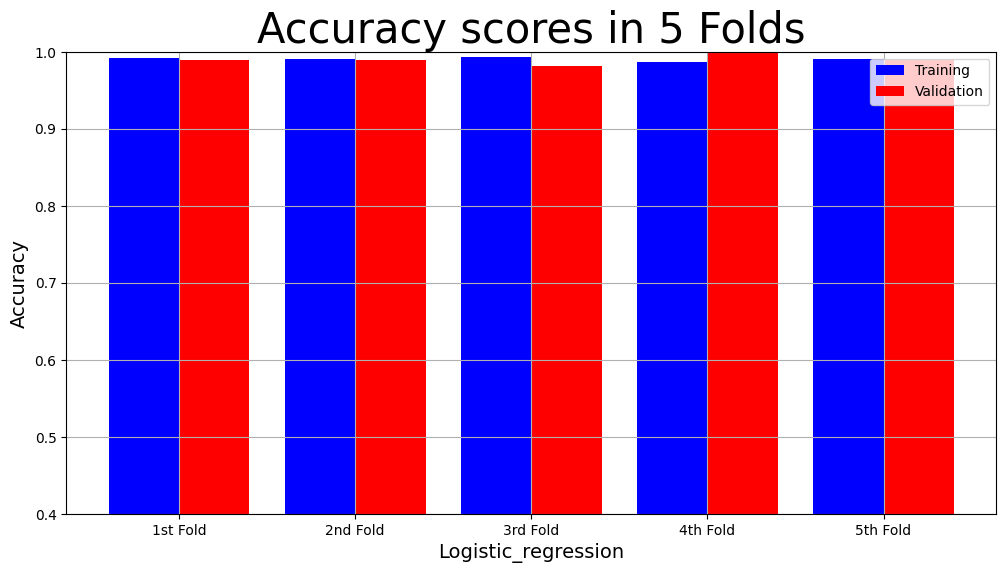

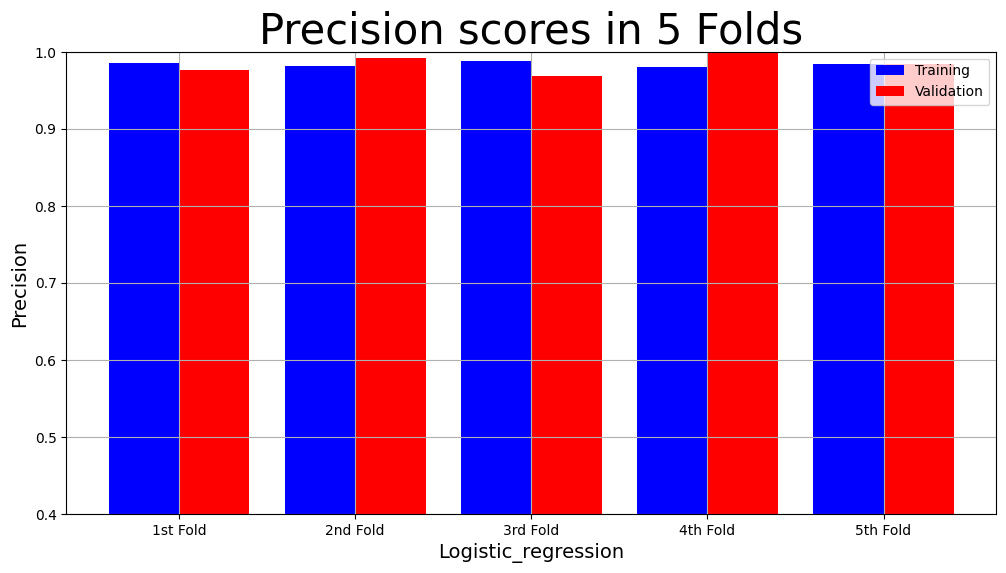

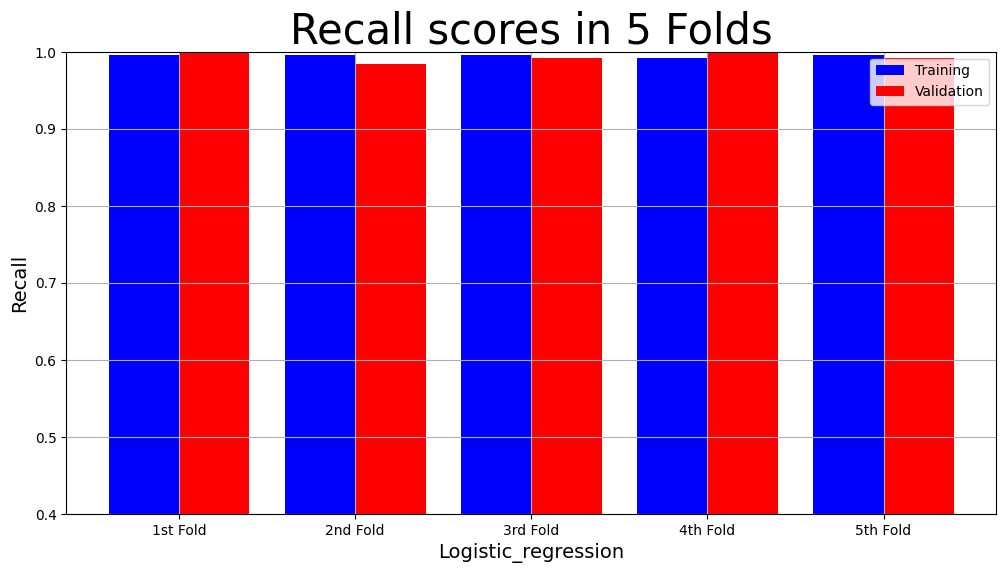

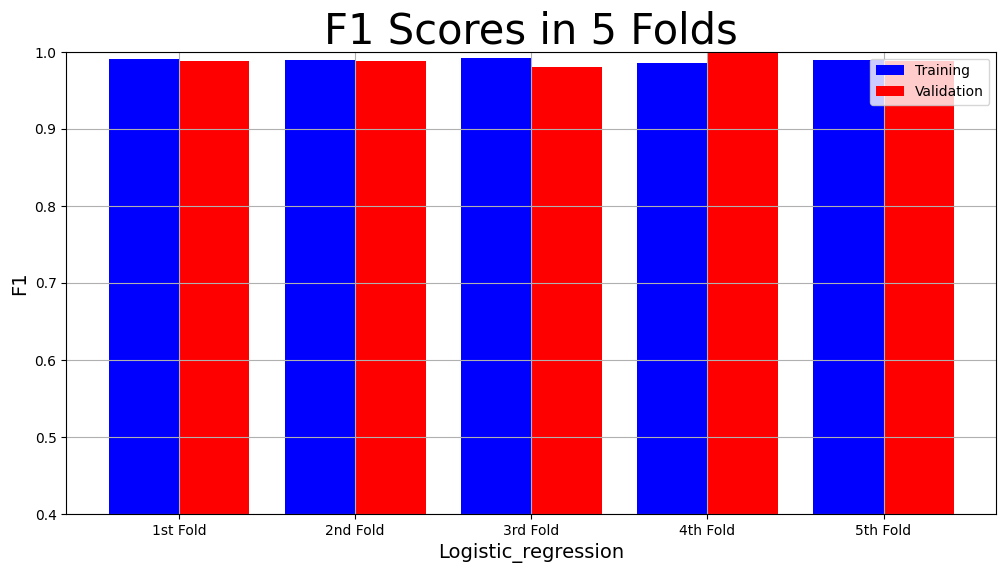

In [ ]:

# Plot Accuracy Result
model_name = "Logistic_regression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Logistic_regression_result["Training Accuracy scores"],
            Logistic_regression_result["Validation Accuracy scores"])

# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            Logistic_regression_result["Training Precision scores"],
            Logistic_regression_result["Validation Precision scores"])

# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            Logistic_regression_result["Training Recall scores"],
            Logistic_regression_result["Validation Recall scores"])

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            Logistic_regression_result["Training F1 scores"],
            Logistic_regression_result["Validation F1 scores"])

Se puede observar que en cada una de las fases de validación cruzada se tiene una precisión, f1 score, recall y un promedio igual de alto que en las fases de entrenamiento por lo que se puede garantizar generalización del modelo.

Por lo tanto, si entrenamos el modelo con todos los datos tenemos que el ajuste de los hiperparametros es adecuado ya que como vimos anteriormente hay garantia de generalización para datos nuevos que se reciban.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

percentage_sample = 0.8
sample_size = df.shape[0]

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

clf = LogisticRegression(random_state=0).fit(X, y)
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### **Arboles de desición**

Ahora vamos a implemetar el modelo de aprendizaje relacionado con árboles de decisión:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=0)

decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.97818182, 0.98909091, 0.99270073, 0.98540146, 0.99270073]), 'Mean Validation Accuracy': 98.76151293961513, 'Validation Precision scores': array([0.96774194, 0.98373984, 0.99180328, 0.97580645, 0.99180328]), 'Mean Validation Precision': 0.9821789563744396, 'Validation Recall scores': array([0.98360656, 0.99180328, 0.99180328, 0.99180328, 0.99180328]), 'Mean Validation Recall': 0.9901639344262294, 'Validation F1 scores': array([0.97560976, 0.9877551 , 0.99180328, 0.98373984, 0.99180328]), 'Mean Validation F1 Score': 0.9861422505827602}


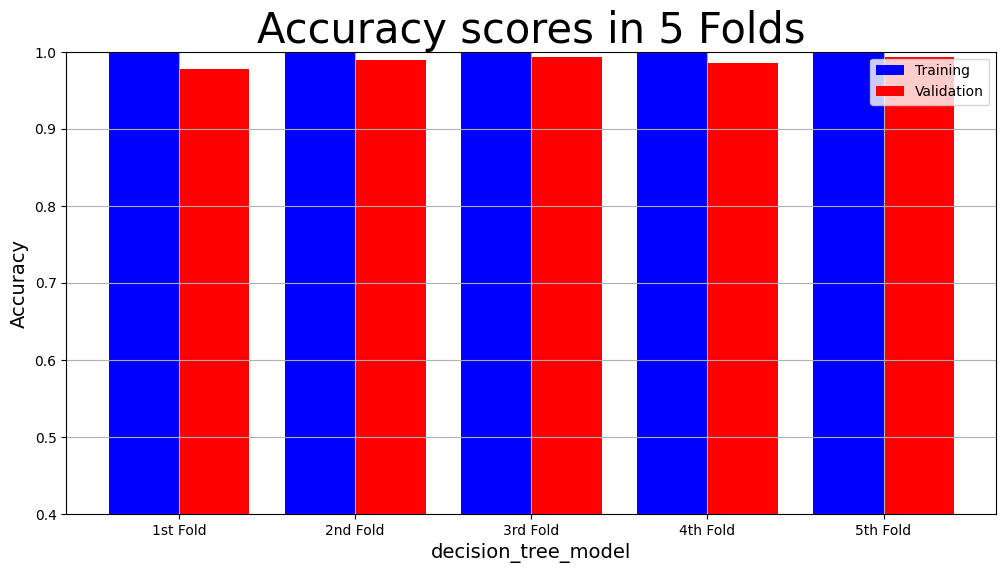

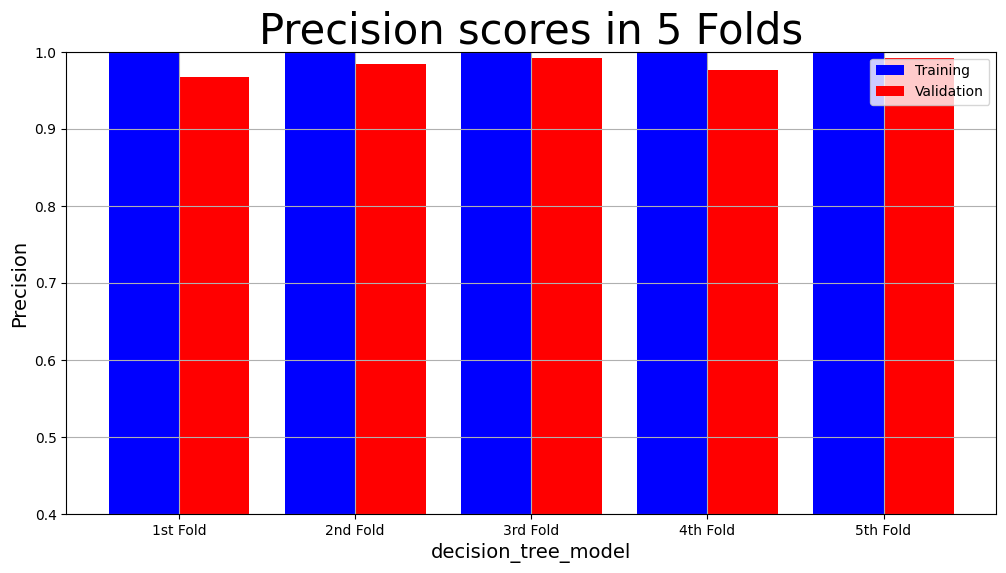

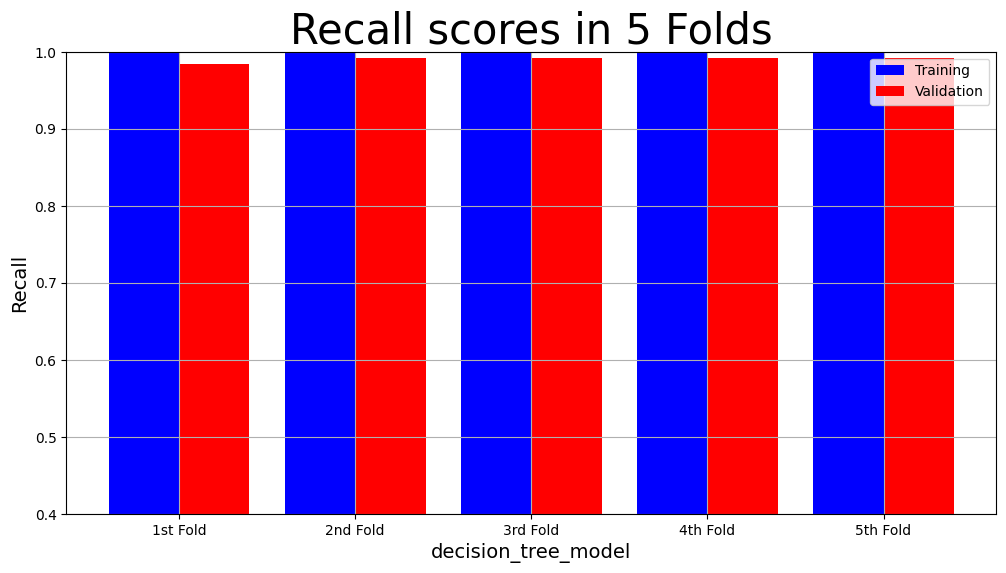

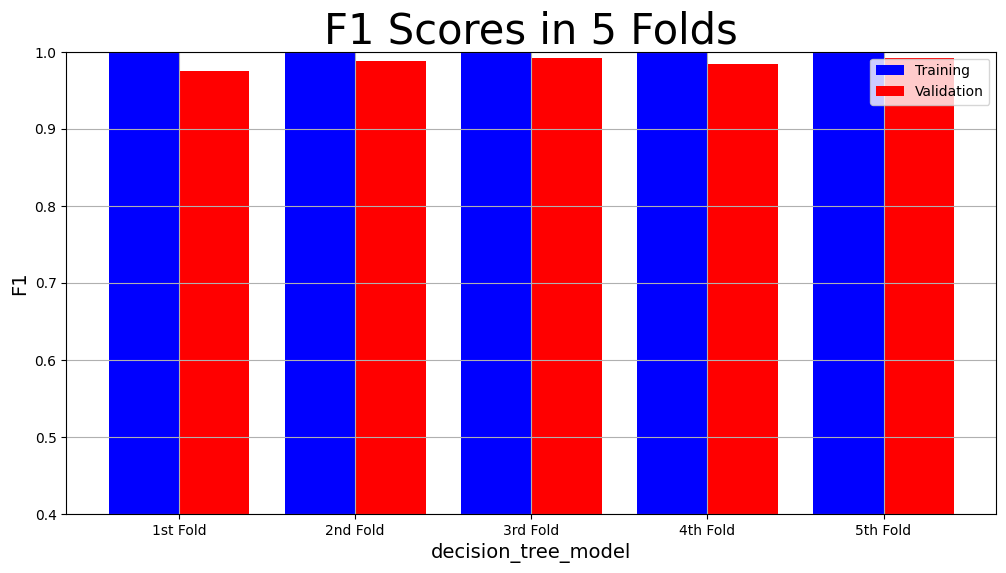

In [ ]:
# Plot Accuracy Result
model_name = "decision_tree_model"
model_result = decision_tree_result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            model_result["Training Accuracy scores"],
            model_result["Validation Accuracy scores"])

# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            model_result["Training Precision scores"],
            model_result["Validation Precision scores"])

# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            model_result["Training Recall scores"],
            model_result["Validation Recall scores"])

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            model_result["Training F1 scores"],
            model_result["Validation F1 scores"])

Se puede observar que en cada una de las fases de validación cruzada se tiene una precisión, f1 score, recall y un promedio igual de alto que en las fases de entrenamiento por lo que se puede garantizar generalización del modelo.

De esta manera, al igual que con la regresión logistica el modelo se puede entrenar con todos los datos y se tiene una alta confianza de que este generalice para datos nuevos dado su buen desempeño en la validación cruzada. De esta manera, el arbol de decisión sería el siguiente

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

percentage_sample = 0.8
sample_size = df.shape[0]

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=['Varianza', 'Asimetría', 'Curtosis', 'Entropía'])
print(r)

|--- Varianza <= 0.32
|   |--- Asimetría <= 7.57
|   |   |--- class: 1
|   |--- Asimetría >  7.57
|   |   |--- class: 0
|--- Varianza >  0.32
|   |--- Curtosis <= -4.39
|   |   |--- class: 1
|   |--- Curtosis >  -4.39
|   |   |--- class: 0



In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.4906716417910448, 0.9375, 'x[0] <= 0.32\ngini = 0.494\nsamples = 1372\nvalue = [762, 610]'),
 Text(0.3208955223880597, 0.8125, 'x[1] <= 7.565\ngini = 0.306\nsamples = 657\nvalue = [124, 533]'),
 Text(0.22388059701492538, 0.6875, 'x[0] <= -0.403\ngini = 0.131\nsamples = 552\nvalue = [39, 513]'),
 Text(0.11940298507462686, 0.5625, 'x[2] <= 6.219\ngini = 0.07\nsamples = 471\nvalue = [17, 454]'),
 Text(0.05970149253731343, 0.4375, 'x[1] <= 7.293\ngini = 0.006\nsamples = 324\nvalue = [1, 323]'),
 Text(0.029850746268656716, 0.3125, 'gini = 0.0\nsamples = 320\nvalue = [0, 320]'),
 Text(0.08955223880597014, 0.3125, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05970149253731343, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11940298507462686, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1791044776119403, 0.4375, 'x[1] <= -4.675\ngini = 0.194\nsamples = 147\nvalue = [16, 131]'),
 Text(0.14925373134328357, 0.3125, 'gini = 0.0\nsamples 

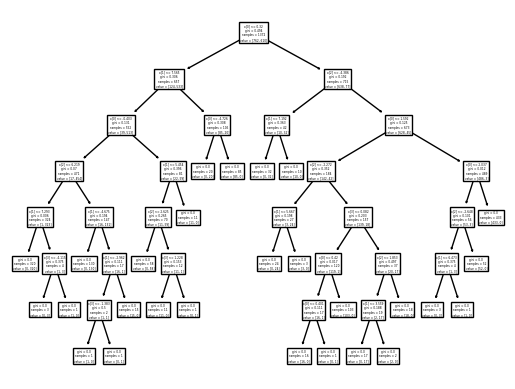

In [ ]:

tree.plot_tree(clf)

### **Kernels Polinomiales**

In [ ]:
from sklearn import svm
svm_kernel_model = svm.SVC(kernel='poly',degree = 2)

svm_kernel_result = cross_validation(svm_kernel_model, X, y, 5)
print(svm_kernel_result)

{'Training Accuracy scores': array([0.97538742, 0.96991796, 0.97723133, 0.97358834, 0.96994536]), 'Mean Training Accuracy': 97.32140811253743, 'Training Precision scores': array([0.94757282, 0.93666027, 0.95126706, 0.94390716, 0.93666027]), 'Mean Training Precision': 0.9432135132330665, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([0.97308076, 0.96729435, 0.97502498, 0.97114428, 0.96729435]), 'Mean Training F1 Score': 0.9707677426087192, 'Validation Accuracy scores': array([0.97090909, 0.96727273, 0.96715328, 0.98175182, 0.97445255]), 'Mean Validation Accuracy': 97.2307896483079, 'Validation Precision scores': array([0.93846154, 0.93129771, 0.93129771, 0.96062992, 0.94573643]), 'Mean Validation Precision': 0.9414846627354473, 'Validation Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Validation Recall': 1.0, 'Validation F1 scores': array([0.96825397, 0.96442688, 0.96442688, 0.97991968, 0.97211155]), 'Mean Validation

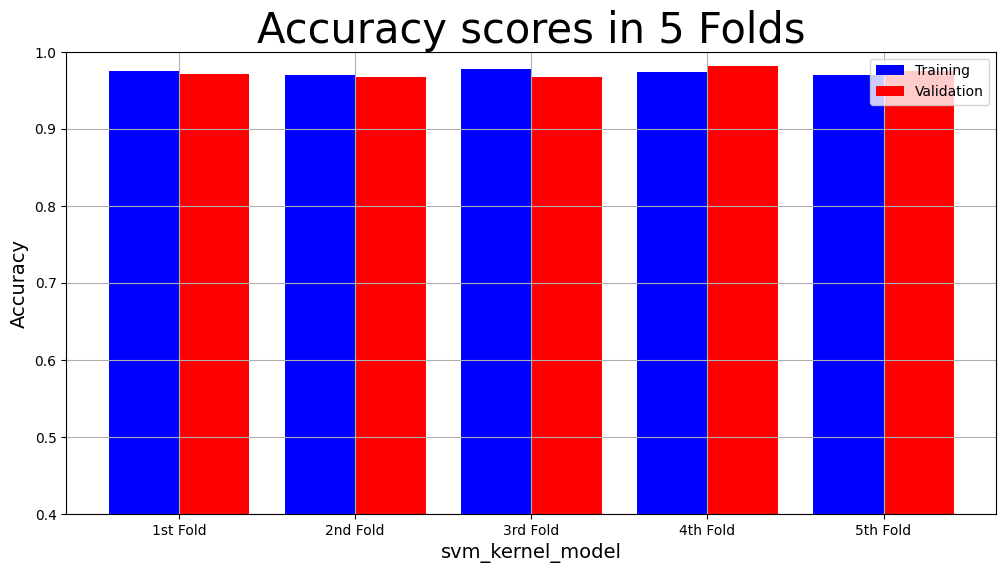

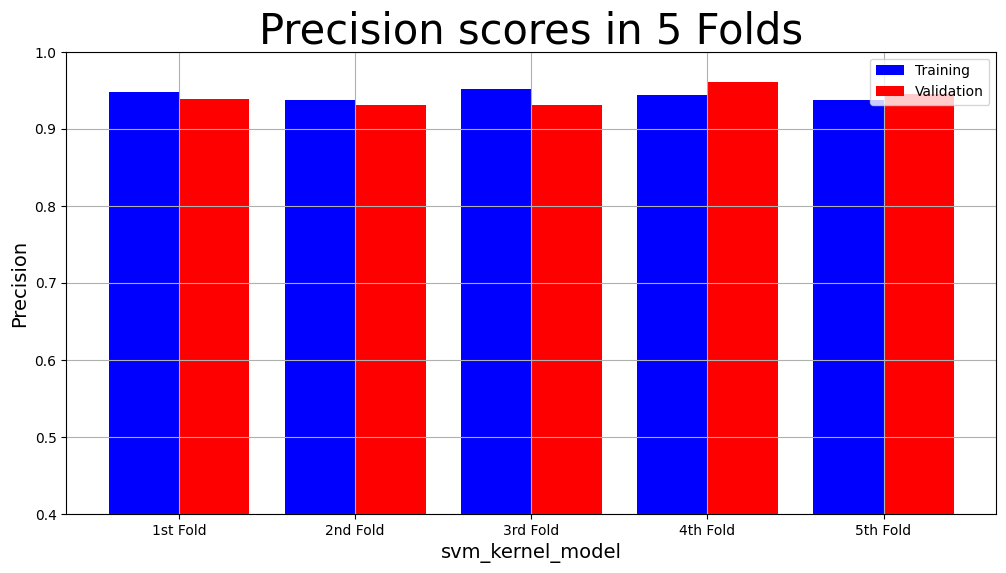

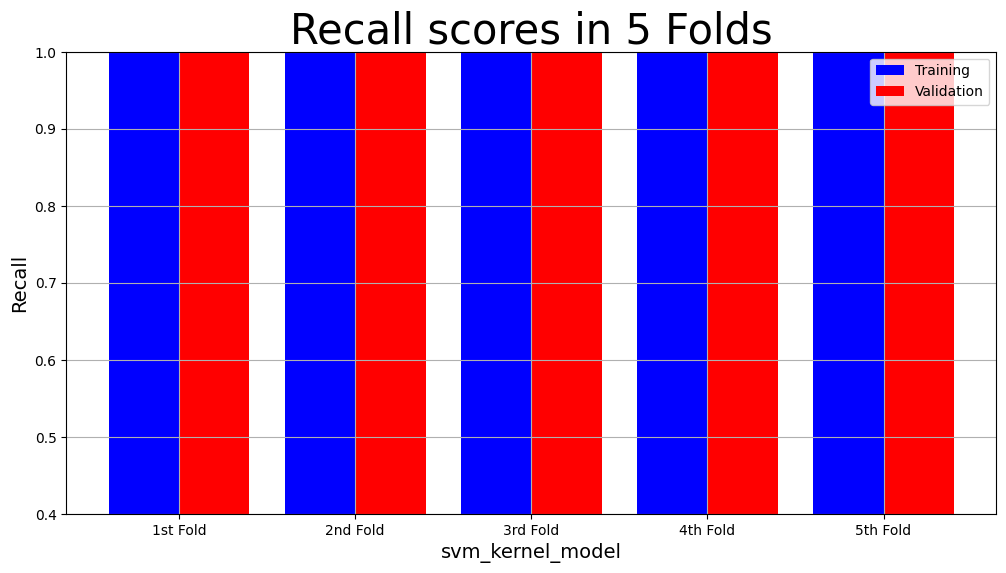

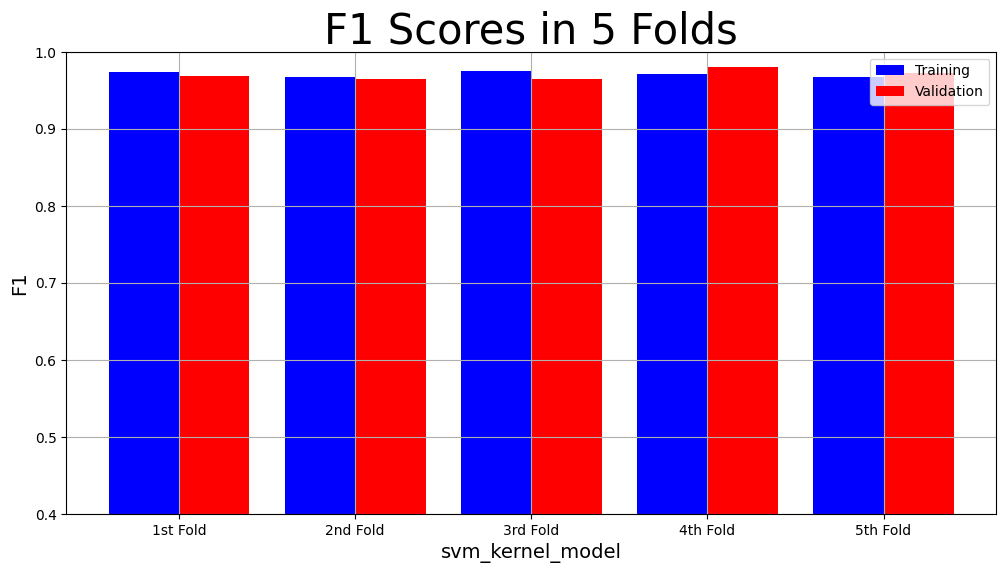

In [ ]:
# Plot Accuracy Result
model_name = "svm_kernel_model"
model_result = svm_kernel_result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            model_result["Training Accuracy scores"],
            model_result["Validation Accuracy scores"])

# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            model_result["Training Precision scores"],
            model_result["Validation Precision scores"])

# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            model_result["Training Recall scores"],
            model_result["Validation Recall scores"])

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            model_result["Training F1 scores"],
            model_result["Validation F1 scores"])

Se puede observar que en cada una de las fases de validación cruzada se tiene una precisión, f1 score, recall y un promedio igual de alto que en las fases de entrenamiento por lo que se puede garantizar generalización del modelo.

De esta manera, los vectores de soporte para este modelo serian los siguientes usando todos los datos como entrenamiento, ya que tenemos una alta probabilidad de generalización por lo desarrollado previamente.

In [ ]:
from sklearn import svm
from sklearn.tree import export_text

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

svm_kernel_model = svm.SVC(kernel='poly',degree = 2)
svm_kernel = svm_kernel_model.fit(X, y)

svm_kernel.support_vectors_

array([[ 3.8660e+00, -2.6383e+00,  1.9242e+00,  1.0645e-01],
       [ 3.2924e-01, -4.4552e+00,  4.5718e+00, -9.8880e-01],
       [ 3.9899e+00, -2.7066e+00,  2.3946e+00,  8.6291e-01],
       ...,
       [-1.0116e+00, -1.9038e-01, -9.0597e-01,  3.0030e-03],
       [-1.5732e+00,  1.0636e+00, -7.1232e-01, -8.3880e-01],
       [-2.4100e+00,  3.7433e+00, -4.0215e-01, -1.2953e+00]])

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_model = KNeighborsClassifier()

neigh_result = cross_validation(neigh_model, X, y, 5)
print(neigh_result)
     

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Validation Accuracy': 100.0, 'Validation Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Validation Precision': 1.0, 'Validation Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Validation Recall': 1.0, 'Validation F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Validation F1 Score': 1.0}


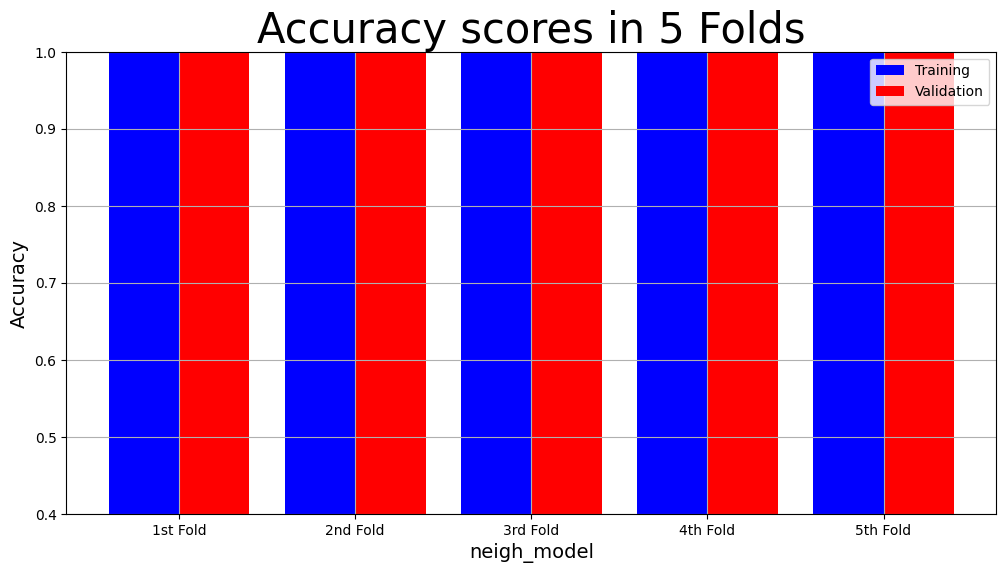

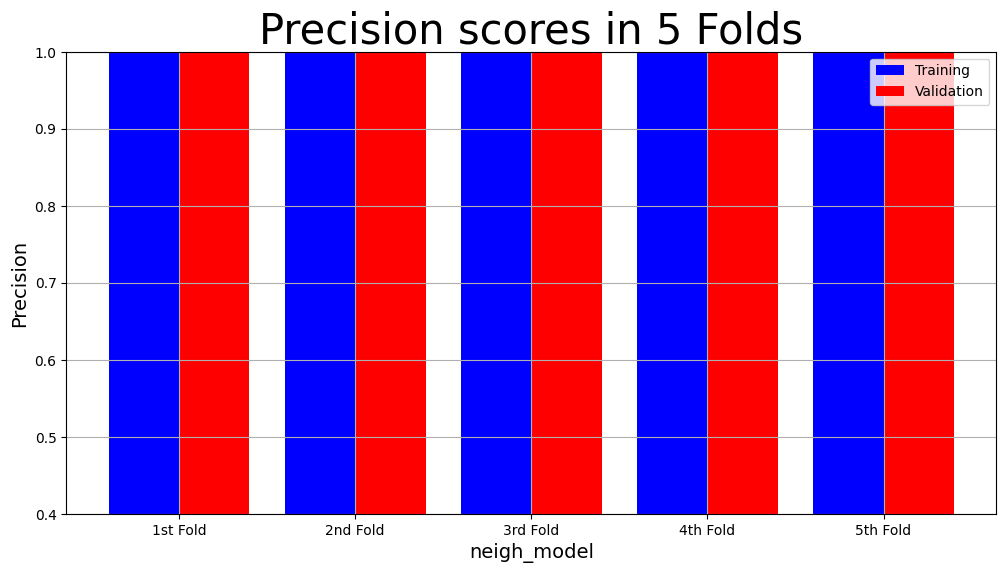

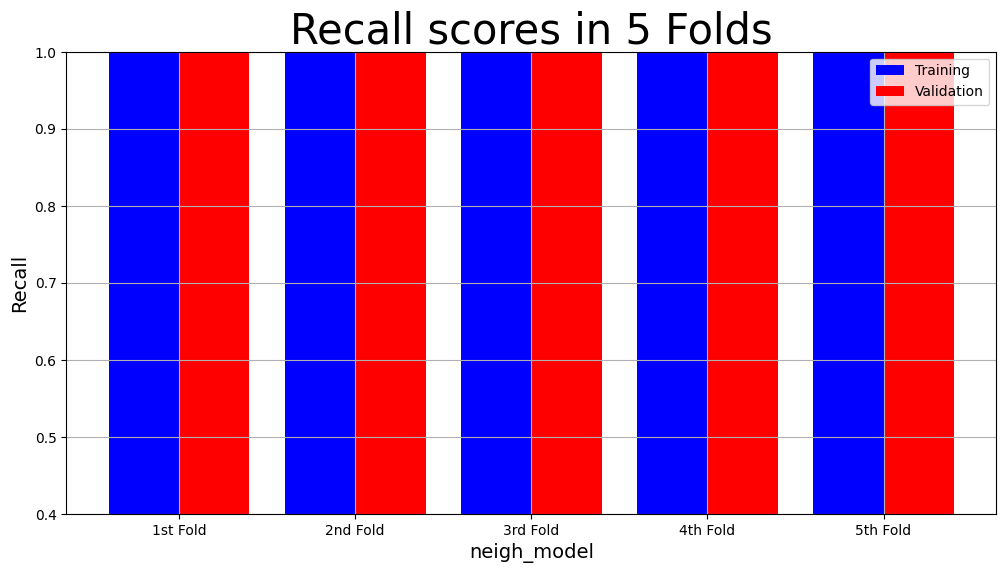

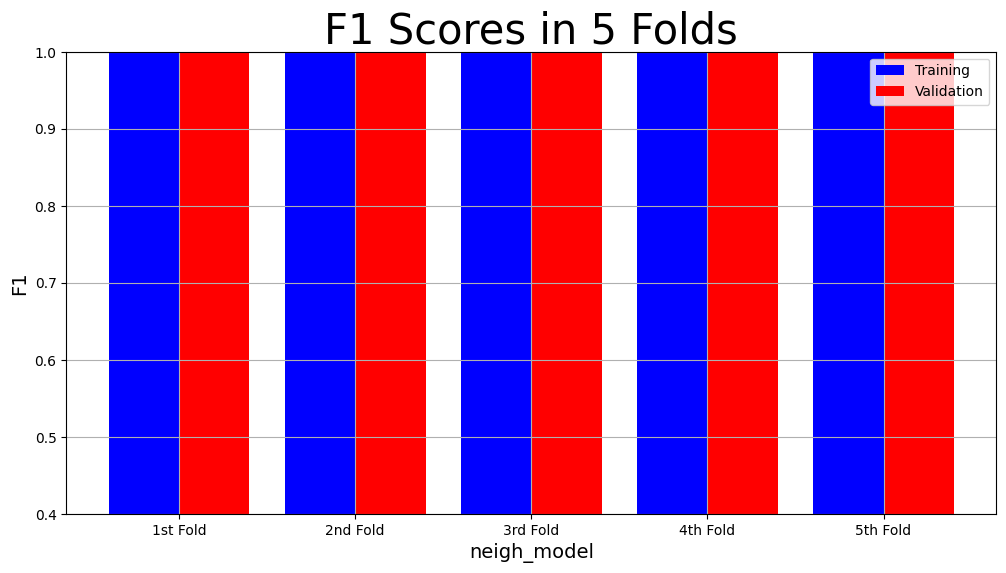

In [ ]:
# Plot Accuracy Result
model_name = "neigh_model"
model_result = neigh_result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            model_result["Training Accuracy scores"],
            model_result["Validation Accuracy scores"])

# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            model_result["Training Precision scores"],
            model_result["Validation Precision scores"])

# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            model_result["Training Recall scores"],
            model_result["Validation Recall scores"])

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            model_result["Training F1 scores"],
            model_result["Validation F1 scores"])

Se puede observar que en cada una de las fases de validación cruzada se tiene una precisión, f1 score, recall y un promedio igual de alto que en las fases de entrenamiento por lo que se puede garantizar generalización del modelo.

De esta manera, al igual que con los espacios de hipótesis previos el modelo KNN se puede entrenar con todos los datos y se tiene una alta confianza de que este generalice para datos nuevos dado su buen desempeño en la validación cruzada. De esta manera, la información del entrenamiento del modelo con los datos es la siguiente.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

neigh_model = KNeighborsClassifier()
neigh = neigh_model.fit(X, y)

neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### **Referencias**

[1].   The HundredPage Machine Learning,Andriy Burkov, 2019. 

[2].   Support Vector Machine Optimization in Python, https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/

[3].  Visualization and Predicting with our Custom SVM: https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/?completed=/svm-optimization-python-2-machine-learning-tutorial/

[4]. Implementing SVM from Scratch Using Python: https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html

[5]. ConvexHull and linear separability: https://web.mit.edu/dxh/www/convex.pdf

[6]. Intersección entre envolventes convexas: https://stackoverflow.com/questions/59416730/determining-whether-two-convex-hulls-overlap

[7]. scipy.spatial.ConvexHull: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html


[8]. Pearson correlation: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

[9]. Experimiento aleatorio: https://www.educarex.es/pub/cont/com/0019/documentos/pruebas-acceso/contenidos/modulo_IV/matematicas/4mat08.pdf